# Segmentation
**https://www.geeksforgeeks.org/image-segmentation-using-pythons-scikit-image-module/**

**https://scikit-image.org/docs/stable/auto_examples/segmentation/index.html**

### Grayscale and HSV

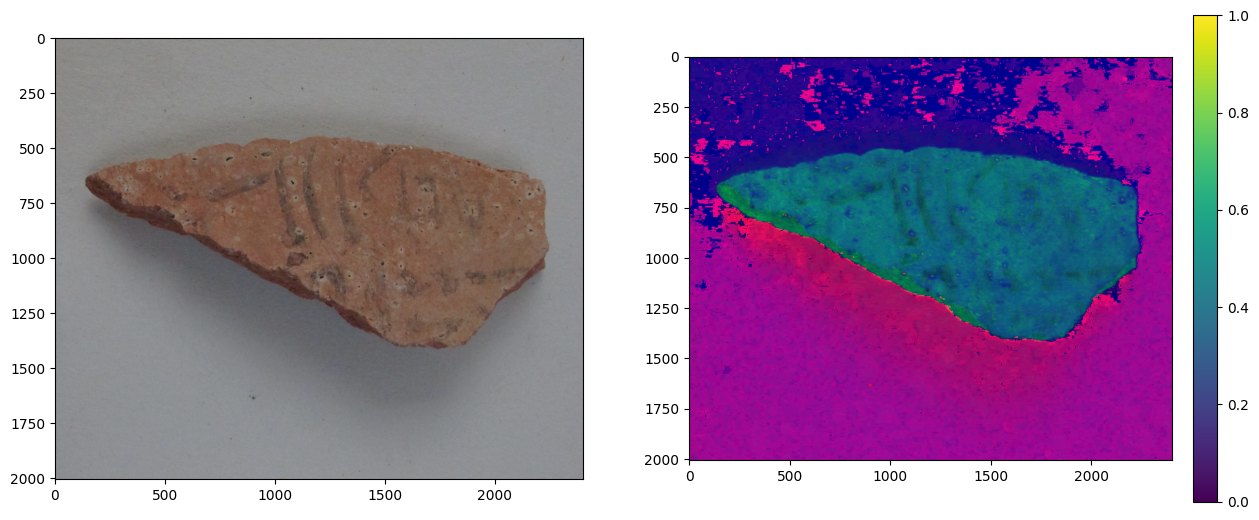

In [42]:
# Importing Necessary Libraries
from skimage import data
from skimage.color import rgb2hsv
import matplotlib.pyplot as plt

# Setting the plot size to 15,15
plt.figure(figsize=(15, 15))

# Sample Image of scikit-image package
coffee = skimage.io.imread("original-1-12.JPG")
plt.subplot(1, 2, 1)

# Displaying the sample image
plt.imshow(coffee)

# Converting RGB Image to HSV Image
hsv_coffee = rgb2hsv(coffee)
gray_coffee = rgb2gray(coffee)
plt.subplot(1, 2, 2)

# Displaying the sample image - HSV Format
hsv_coffee_colorbar = plt.imshow(hsv_coffee)

# Adjusting colorbar to fit the size of the image
plt.colorbar(hsv_coffee_colorbar, fraction=0.046, pad=0.04)


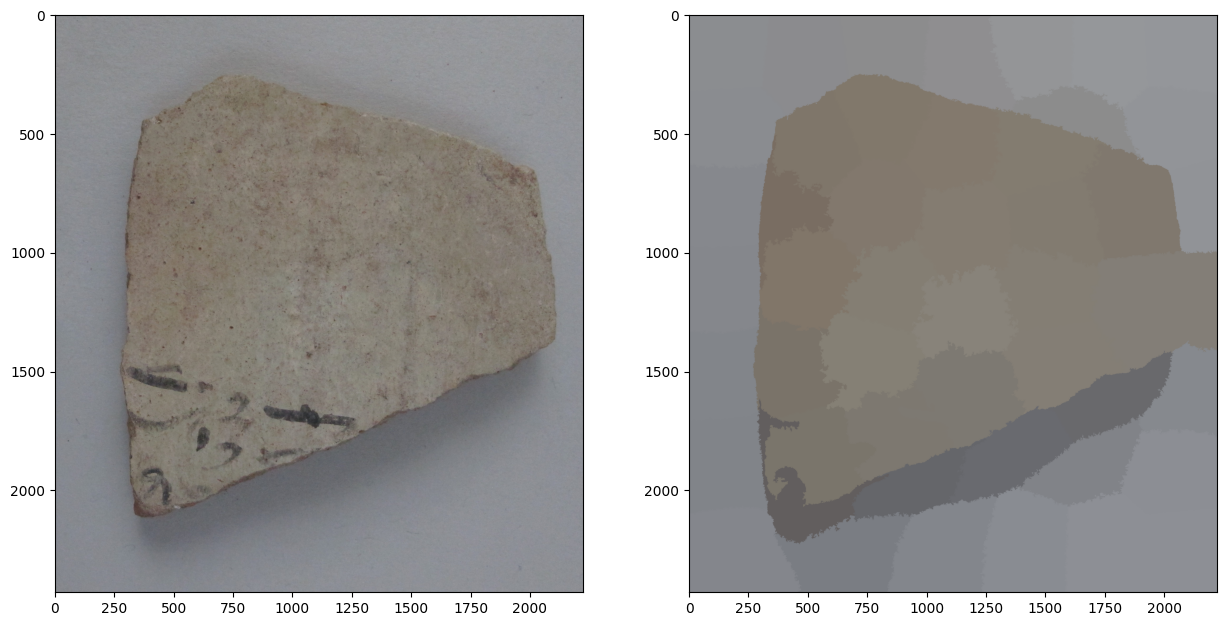

In [24]:
# Importing required libraries
from skimage.segmentation import slic
from skimage.data import astronaut
from skimage.color import label2rgb

# Setting the plot size as 15, 15
plt.figure(figsize=(15,15))

# Sample Image of scikit-image package
# astronaut = astronaut()
astronaut = skimage.io.imread("original-1-7.JPG")

# Applying Simple Linear Iterative
# Clustering on the image
# - 50 segments & compactness = 10
astronaut_segments = slic(astronaut,
                          n_segments=50,
                          compactness=10)
plt.subplot(1,2,1)

# Plotting the original image
plt.imshow(astronaut)
plt.subplot(1,2,2)

# Converts a label image into
# an RGB color image for visualizing
# the labeled regions. 
plt.imshow(label2rgb(astronaut_segments,
                     astronaut,
                     kind = 'avg'))


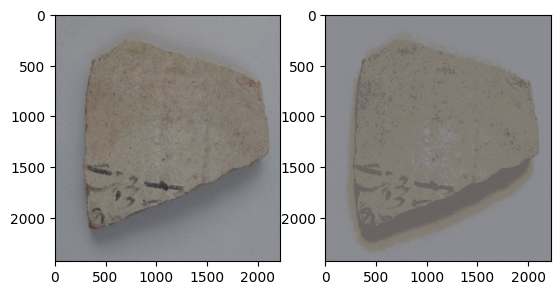

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Read in the image
image = cv2.imread('original-1-7.JPG')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3))

# Convert to float type
pixel_vals = np.float32(pixel_vals)

#the below line of code defines the criteria for the algorithm to stop running, 
#which will happen is 100 iterations are run or the epsilon (which is the required accuracy) 
#becomes 85%
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

# then perform k-means clustering with number of clusters defined as 3
#also random centres are initially choosed for k-means clustering
k = 3
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))


f, axarr = plt.subplots(1,2) 
axarr[0].imshow(image)
axarr[1].imshow(segmented_image)
# plt.imshow(image)
# plt.imshow(image, segmented_image)

